In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = np.array(df.loc[:, df.columns != 'output'])
y = np.array(df['output'])
x.shape, y.shape

((303, 13), (303,))

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_train)
x_te = scaler.fit_transform(x_test)

In [6]:
class NeuralNetworkFromScratch:
    def __init__(self, lr, x_train, y_train, x_test, y_test):  # initail constructor for the class where weights, bias, learning rate, x_train, y_train, x_test, y_test, train_loss and test_loss are initialized
        self.weights = np.random.randn(x_train.shape[1])
        self.bias = np.random.randn(1)
        self.lr = lr
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.tr_losses = []
        self.te_losses = []
        
    def activation(self, x):             # activation function i.e the sigmoid function
        return 1 / (1 + np.exp(-x))      # returns the sigmoid value of x
    
    def gradient(self, x):               # gradiant of the sigmoid function
        return self.activation(x) * (1 - self.activation(x))      # returns the gradiant of the sigmoid function
    
    def forward(self, x):
        hidden_1 = np.dot(x, self.weights) + self.bias     # hidden layer 1
        activate_1 = self.activation(hidden_1)             # activation of hidden layer 1
        return activate_1
    
    def backward(self, x, y_true):                      # backpropagation
        hidden_1 = np.dot(x, self.weights) + self.bias  # hidden layer 1
        y_pred = self.forward(x)                        # prediction of the model
        dl_pred = 2 * (y_pred - y_true)                 # derivative of the loss of the prediction
        dpred_hidden = self.gradient(hidden_1)          # derivative of the predictions to the hidden layer
        dhidden1_weights = x                            # weights of derivative of the hidden layer 1
        dhidden1_bias = 1                               # bias of the derivative of the hidden layer 1
        
        dl_db = dl_pred * dpred_hidden * dhidden1_bias  # derivative of the loss to the bias
        dl_dw = dl_pred * dpred_hidden * dhidden1_weights  # derivative of the loss to the weights
        return dl_dw, dl_db
    
    def optimizer(self, dl_dw, dl_db):
        self.weights = self.weights - self.lr * dl_dw
        self.bias = self.bias - self.lr * dl_db      # optimizer function to update the weights and bias
        
    def train(self, Iterations):
        for i in range(Iterations):
            random_pos = np.random.randint(0, len(self.x_train))     # getting a random position of the training data
            y_train_pred = self.forward(self.x_train[random_pos])    # getting the predicted value of the training data using forward propogation 
            loss = np.square(self.y_train[random_pos] - y_train_pred)    # calculating the loss of the model
            self.tr_losses.append(loss)                             # appending the loss of the model to the train loss list
            dl_dw, dl_db = self.backward(self.x_train[random_pos], self.y_train[random_pos])  # getting the derivative of the loss to the weights and bias
            self.optimizer(dl_dw, dl_db)                            # optimizing the weights and bias
            
            loss_sum = 0
            for j in range(len(self.x_test)):
                y_test_pred = self.forward(self.x_test[j])          # getting the predicted value of the test data using forward propogation
                loss_sum += np.square(self.y_test[j] - y_test_pred) # calculating the loss of the model on the test data
            self.te_losses.append(loss_sum/len(self.x_test))      # appending the loss of the model on the test data to the test loss list
        return "Training Done"

In [7]:
# initialized some hyper parameters learning rate and number of iterations
lr = 0.1
iters = 1000

In [8]:
# create a model object using the class we created
nn = NeuralNetworkFromScratch(lr, x_tr, y_train, x_te, y_test)

nn.train(Iterations=iters)  # start the training of the model

'Training Done'

In [ ]:
te_loss = [i[0] for i in nn.te_losses]  # get the test loss values
# te_loss

<Axes: >

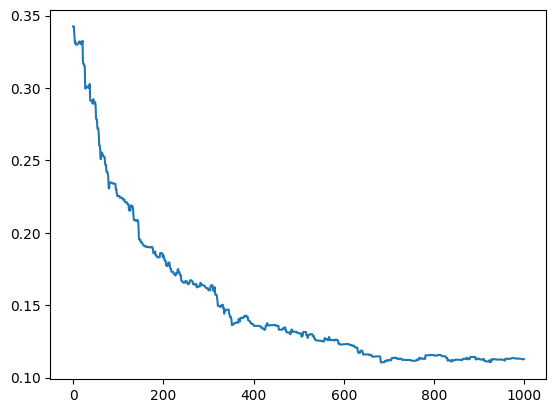

In [10]:
sns.lineplot(x=list(range(len(nn.te_losses))), y=te_loss)  # plot the loss of the model on the test data

In [11]:
total = x_te.shape[0]  # total number of test data  
correct = 0           # number of correct predictions
y_preds = []           # list to store the predictions   
for i in range(total):
    y_pred = np.round(nn.forward(x_te[i]))  # get the prediction of the model
    y_preds.append(y_pred)         # append the prediction to the list
    correct += 1 if y_pred == y_test[i] else 0  # check if the prediction is correct and increment the correct variable

In [12]:
correct/total  # accuracy of the model

0.8688524590163934

In [13]:
from collections import Counter
Counter(y_test)  # count the number of predictions of the model

Counter({np.int64(1): 32, np.int64(0): 29})

In [14]:
32/61    #baseline accuracy

0.5245901639344263

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)  # confusion matrix of the model

array([[24,  5],
       [ 3, 29]])